In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq


In [2]:
# 1. Generate a 5Hz sine wave (continuous)
fs_continuous = 1000  # High sampling rate for smooth curve
duration = 3  # seconds
t_continuous = np.linspace(0, duration, fs_continuous * duration, endpoint=False)
signal_continuous = np.sin(2 * np.pi * 5 * t_continuous)

In [7]:
# 2. Define sampling rates
sampling_rates = [50, 20, 10, 8, 4, 1]

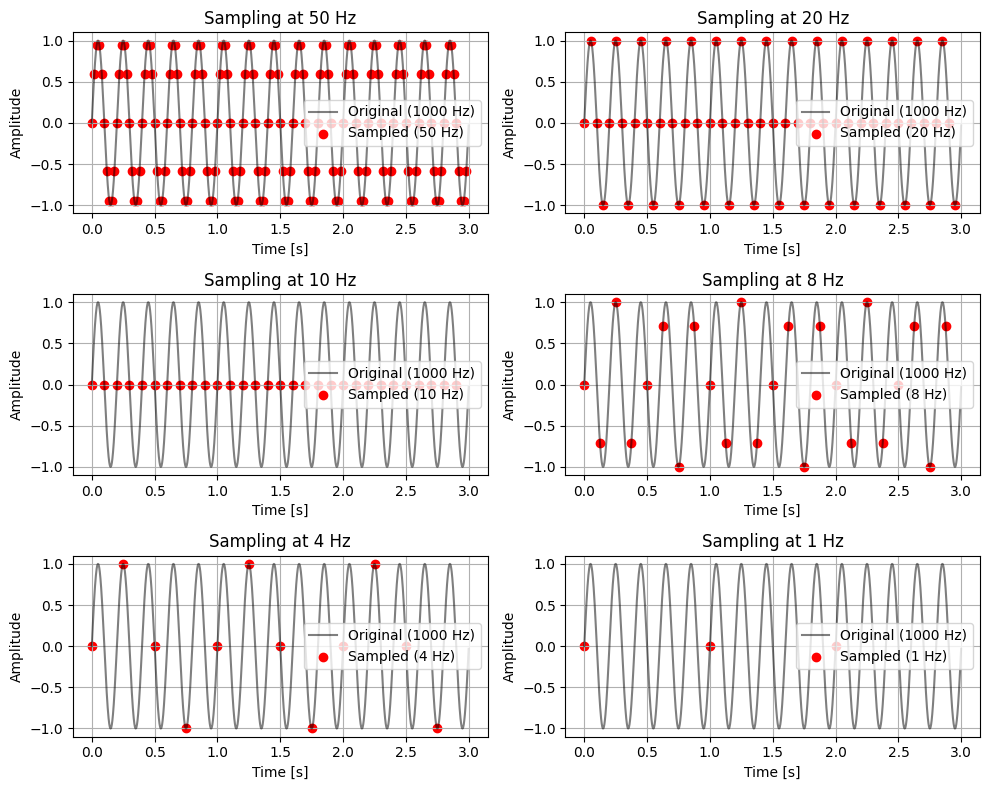

In [8]:
# 3. Plot original and sampled signals
plt.figure(figsize=(10, 8))

for i, fs in enumerate(sampling_rates, 1):
    t_sampled = np.linspace(0, duration, fs * duration, endpoint=False)
    signal_sampled = np.sin(2 * np.pi * 5 * t_sampled)

    plt.subplot(3, 2, i)
    plt.plot(t_continuous, signal_continuous, 'k', alpha=0.5, label="Original (1000 Hz)")
    plt.scatter(t_sampled, signal_sampled, color='red', label=f"Sampled ({fs} Hz)")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.title(f"Sampling at {fs} Hz")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


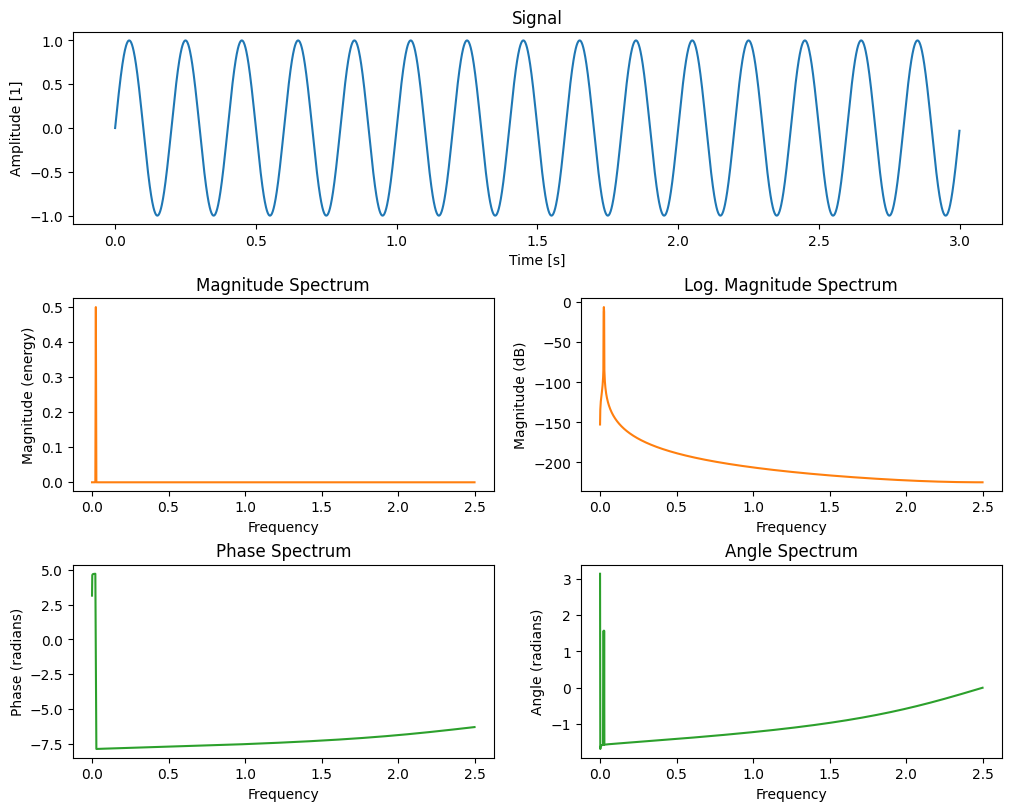

In [ ]:
x = signal_continuous
t = t_continuous
fs = fs_continuous
fig = plt.figure(figsize=(10, 8), layout='constrained')
axs = fig.subplot_mosaic([["signal", "signal"], ["magnitude", "log_magnitude"], ["phase", "angle"]])

axs["signal"].set_title("Signal")
axs["signal"].plot(t, x, color='C0')
axs["signal"].set_xlabel("Time [s]")
axs["signal"].set_ylabel("Amplitude [1]")

axs["magnitude"].set_title("Magnitude Spectrum")
axs["magnitude"].magnitude_spectrum(x, Fs=fs, color='C1')

axs["log_magnitude"].set_title("Log. Magnitude Spectrum")
axs["log_magnitude"].magnitude_spectrum(x, Fs=fs, scale="dB", color='C1')

axs["phase"].set_title("Phase Spectrum")
axs["phase"].phase_spectrum(x, Fs=fs, color='C2')

axs["angle"].set_title("Angle Spectrum")
axs["angle"].angle_spectrum(x, Fs=fs, color='C2')

plt.show()

In [18]:
# 1. Generate the composite signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # 1 second duration
x = np.sin(2 * np.pi * 10 * t) + np.sin(2 * np.pi * 100 * t) + np.sin(2 * np.pi * 250 * t)

# 2. Create Dirac delta and Heaviside step function
N = len(x)
dirac = np.zeros(N)
dirac[0] = 1  # Dirac delta at n=0

heaviside = np.ones(N)  # Heaviside step function


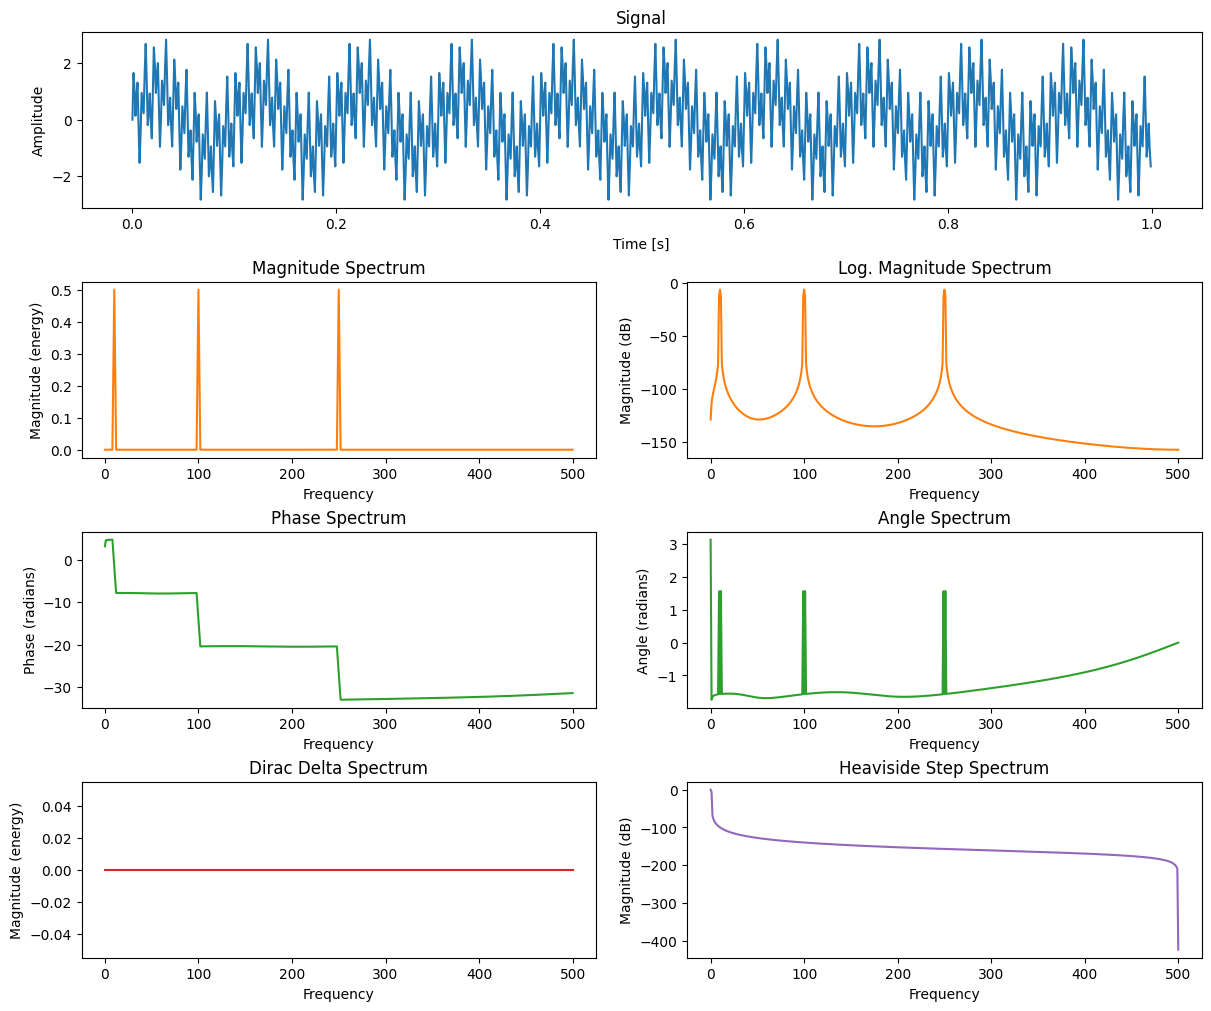

In [22]:
# 3. Plot using subplot_mosaic
fig = plt.figure(figsize=(12, 10), layout='constrained')
axs = fig.subplot_mosaic([
    ["signal", "signal"], 
    ["magnitude", "log_magnitude"], 
    ["phase", "angle"], 
    ["dirac", "heaviside"]
])

# Time-domain signal
axs["signal"].set_title("Signal")
axs["signal"].plot(t, x, color='C0')
axs["signal"].set_xlabel("Time [s]")
axs["signal"].set_ylabel("Amplitude")

# Magnitude spectrum
axs["magnitude"].set_title("Magnitude Spectrum")
axs["magnitude"].magnitude_spectrum(x, Fs=fs, color='C1')

# Log magnitude spectrum
axs["log_magnitude"].set_title("Log. Magnitude Spectrum")
axs["log_magnitude"].magnitude_spectrum(x, Fs=fs, scale="dB", color='C1')

# Phase spectrum
axs["phase"].set_title("Phase Spectrum")
axs["phase"].phase_spectrum(x, Fs=fs, color='C2')

# Angle spectrum
axs["angle"].set_title("Angle Spectrum")
axs["angle"].angle_spectrum(x, Fs=fs, color='C2')

# Dirac Delta spectrum (should be flat)
axs["dirac"].set_title("Dirac Delta Spectrum")
axs["dirac"].magnitude_spectrum(dirac, Fs=fs, color='C3')

# Heaviside Step spectrum (should decay as 1/f)
axs["heaviside"].set_title("Heaviside Step Spectrum")
axs["heaviside"].magnitude_spectrum(heaviside, Fs=fs, scale='dB', color='C4')

plt.show()


In [6]:
# Define parameters
fs = 100000  # Sampling frequency
t = np.arange(0, 0.01, 1/fs)  # Time vector (10 ms)
carrier_freq = 10000  # Carrier frequency (10 kHz)
modulating_freq = 1000  # Modulating frequency (1 kHz)
mod_index = 0.5  # Modulation index

# Generate modulating signal (cosine wave)
modulating_signal = np.cos(2 * np.pi * modulating_freq * t)

# Generate carrier wave
carrier = np.cos(2 * np.pi * carrier_freq * t)

# Amplitude Modulated (AM) Signal
am_signal = (1 + mod_index * modulating_signal) * carrier

# Compute FFT
N = len(am_signal)
fft_values = fft(am_signal)
freqs = fftfreq(N, 1/fs)


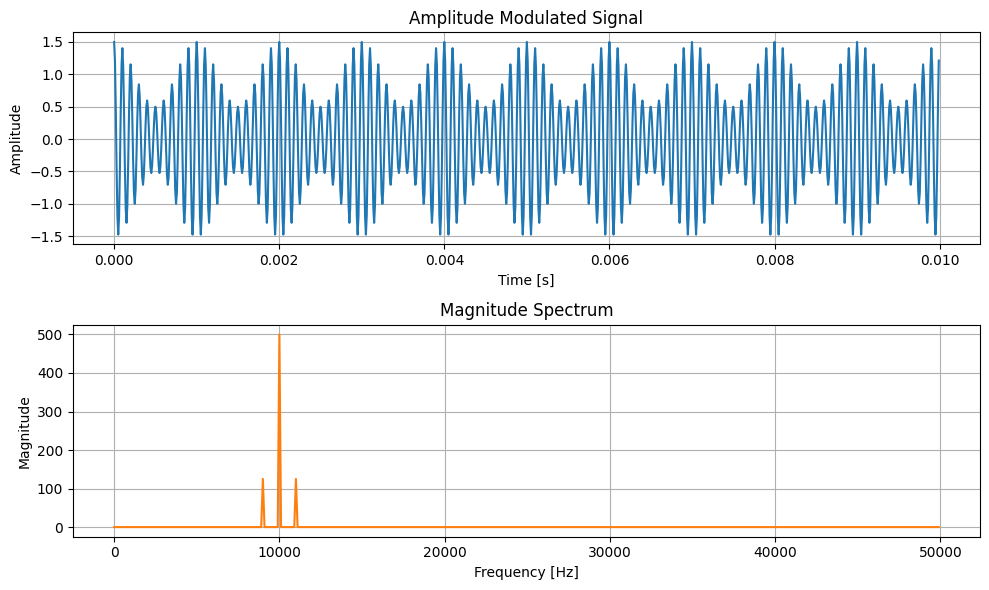

In [7]:
# Plot time-domain signal
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(t, am_signal, color='C0')
axs[0].set_title("Amplitude Modulated Signal")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Amplitude")
axs[0].grid()

# Plot magnitude spectrum
axs[1].plot(freqs[:N//2], np.abs(fft_values[:N//2]), color='C1')
axs[1].set_title("Magnitude Spectrum")
axs[1].set_xlabel("Frequency [Hz]")
axs[1].set_ylabel("Magnitude")
axs[1].grid()

plt.tight_layout()
plt.show()

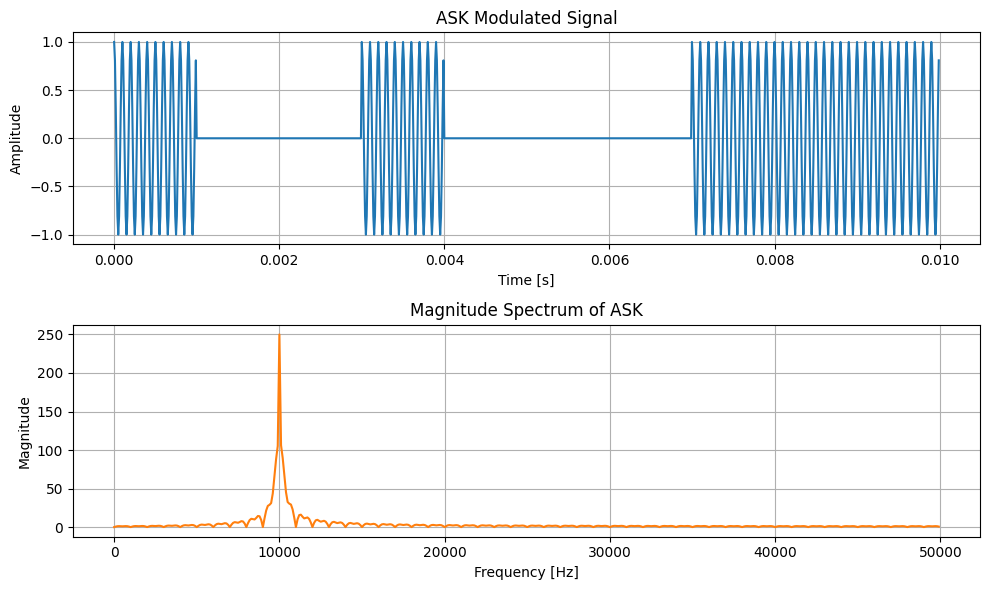

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# Define parameters
fs = 100000  # Sampling frequency
t = np.arange(0, 0.01, 1/fs)  # Time vector (10 ms)
carrier_freq = 10000  # Carrier frequency (10 kHz)
bit_rate = 1000  # Bit rate (1 kbps)
bit_duration = int(fs / bit_rate)  # Samples per bit

# Generate random binary data
data_bits = np.random.randint(0, 2, int(bit_rate * len(t) / fs))

# Convert bits to a modulating signal
modulating_signal = np.repeat(data_bits, bit_duration)

# Generate carrier wave
carrier = np.cos(2 * np.pi * carrier_freq * t)

# ASK Signal (modulated carrier)
ask_signal = modulating_signal[:len(t)] * carrier

# Compute FFT
N = len(ask_signal)
fft_values = fft(ask_signal)
freqs = fftfreq(N, 1/fs)

# Plot time-domain ASK signal
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(t, ask_signal, color='C0')
axs[0].set_title("ASK Modulated Signal")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Amplitude")
axs[0].grid()

# Plot magnitude spectrum
axs[1].plot(freqs[:N//2], np.abs(fft_values[:N//2]), color='C1')
axs[1].set_title("Magnitude Spectrum of ASK")
axs[1].set_xlabel("Frequency [Hz]")
axs[1].set_ylabel("Magnitude")
axs[1].grid()

plt.tight_layout()
plt.show()


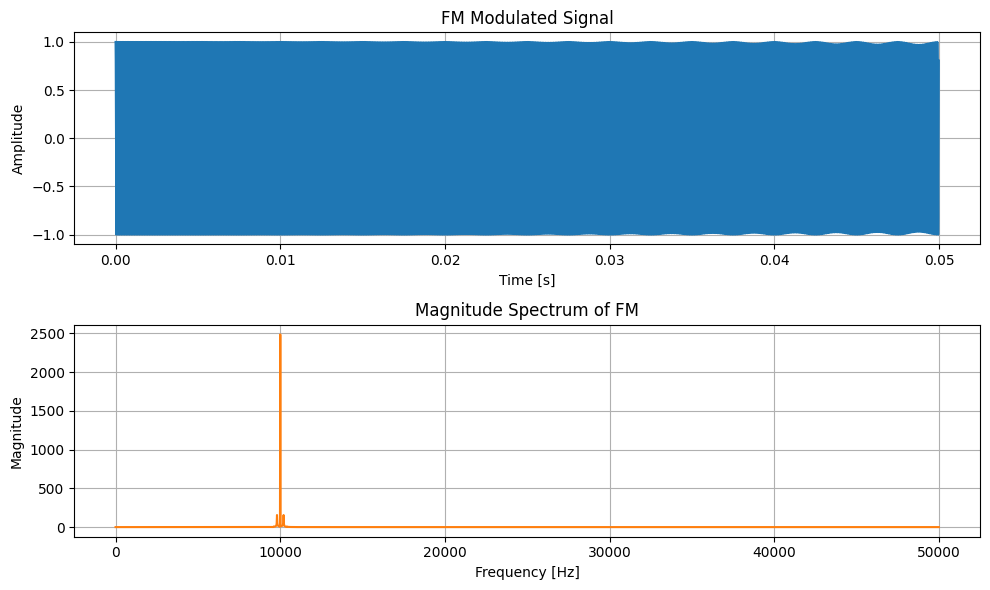

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# Define parameters
fs = 100000  # Sampling frequency
t = np.arange(0, 0.05, 1/fs)  # Time vector (50 ms)
carrier_freq = 10000  # Carrier frequency (10 kHz)
modulating_freq = 200  # Modulating frequency (200 Hz)
modulation_index = 5  # Alpha (modulation index)

# Generate FM signal
fm_signal = np.cos(2 * np.pi * carrier_freq * t + modulation_index * np.sin(2 * np.pi * modulating_freq * t)*t)

# Compute FFT
N = len(fm_signal)
fft_values = fft(fm_signal)
freqs = fftfreq(N, 1/fs)

# Plot time-domain FM signal
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(t, fm_signal, color='C0')
axs[0].set_title("FM Modulated Signal")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Amplitude")
axs[0].grid()

# Plot magnitude spectrum
axs[1].plot(freqs[:N//2], np.abs(fft_values[:N//2]), color='C1')
axs[1].set_title("Magnitude Spectrum of FM")
axs[1].set_xlabel("Frequency [Hz]")
axs[1].set_ylabel("Magnitude")
axs[1].grid()

plt.tight_layout()
plt.show()


In [11]:
carrier_freq_0 = 8000
carrier_freq_1 = 1200
bit_rate = 1000
fs = 100000
t = np.arange(0, 0.01, 1/fs)

data_bits = np.random.randint(0, 2, int(bit_rate * len(t) / fs))
bit_duration = int(fs / bit_rate)

modulating_signal = np.repeat(data_bits, bit_duration)

fsk_signal = np.array([
    np.cos(2 * np.pi * carrier_freq_0 * t[i]) 
    if modulating_signal[i] == 0 
    else np.cos(2 * np.pi * carrier_freq_1 * t[i])
    for i in range(len(t))
])

# Compute FFT
N = len(fsk_signal)
fft_values = fft(fsk_signal)
freqs = fftfreq(N, 1/fs)

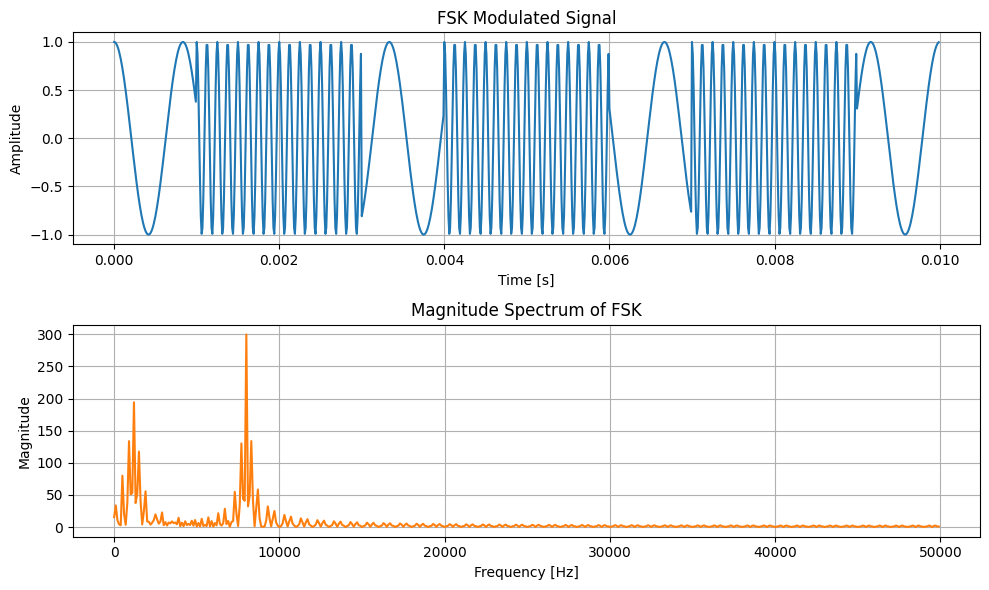

In [12]:

# Plot time-domain FSK signal
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

axs[0].plot(t[:1000], fsk_signal[:1000], color='C0')  # Show first 10 bits
axs[0].set_title("FSK Modulated Signal")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Amplitude")
axs[0].grid()

# Plot magnitude spectrum
axs[1].plot(freqs[:N//2], np.abs(fft_values[:N//2]), color='C1')
axs[1].set_title("Magnitude Spectrum of FSK")
axs[1].set_xlabel("Frequency [Hz]")
axs[1].set_ylabel("Magnitude")
axs[1].grid()

plt.tight_layout()
plt.show()

/tmp/ipykernel_7100/3807448441.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, audio = wav.read(file_path)


Sampling Frequency: 44100 Hz


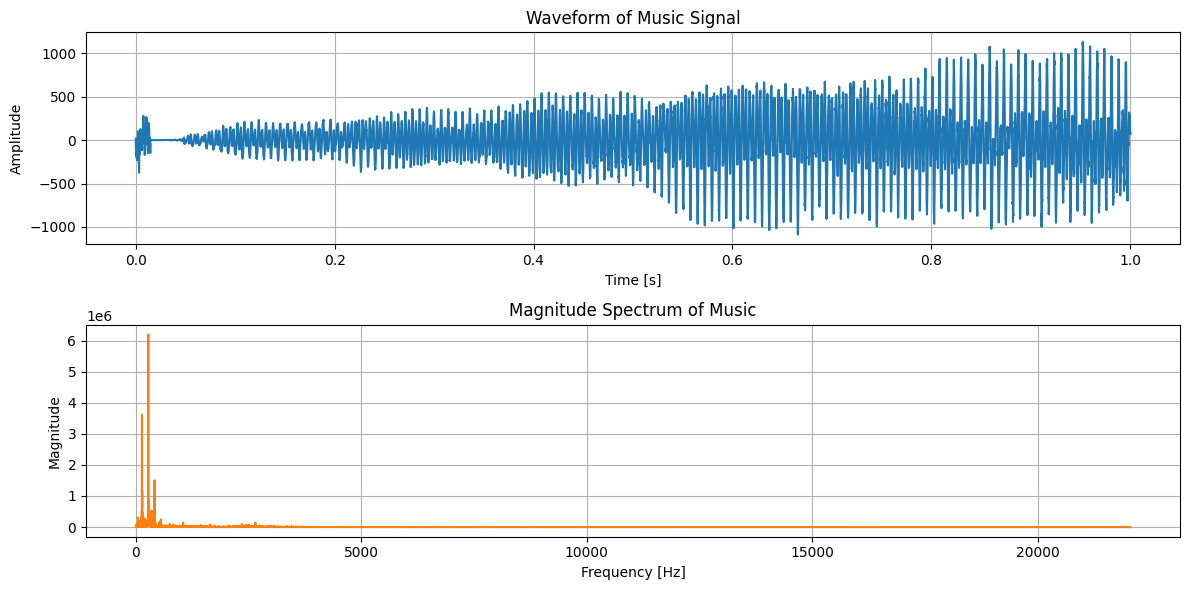

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.fftpack import fft, fftfreq

# Load WAV file
file_path = "BAK.wav"  # Replace with your actual file
fs, audio = wav.read(file_path)

# If stereo, convert to mono
if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1)

# Print sampling frequency
print(f"Sampling Frequency: {fs} Hz")

# Select 1 second of data for analysis
duration = 1  # seconds
samples = int(fs * duration)
audio_sample = audio[:samples]

# Compute FFT
N = len(audio_sample)
fft_values = fft(audio_sample)
freqs = fftfreq(N, 1/fs)

# Plot waveform (time domain)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, duration, samples), audio_sample, color='C0')
plt.title("Waveform of Music Signal")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()

# Plot magnitude spectrum (frequency domain)
plt.subplot(2, 1, 2)
plt.plot(freqs[:N//2], np.abs(fft_values[:N//2]), color='C1')
plt.title("Magnitude Spectrum of Music")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid()

plt.tight_layout()
plt.show()


Header: ["'Elapsed time'", "'MLII'", "'V5'"]
Shape of data (3600, 3)


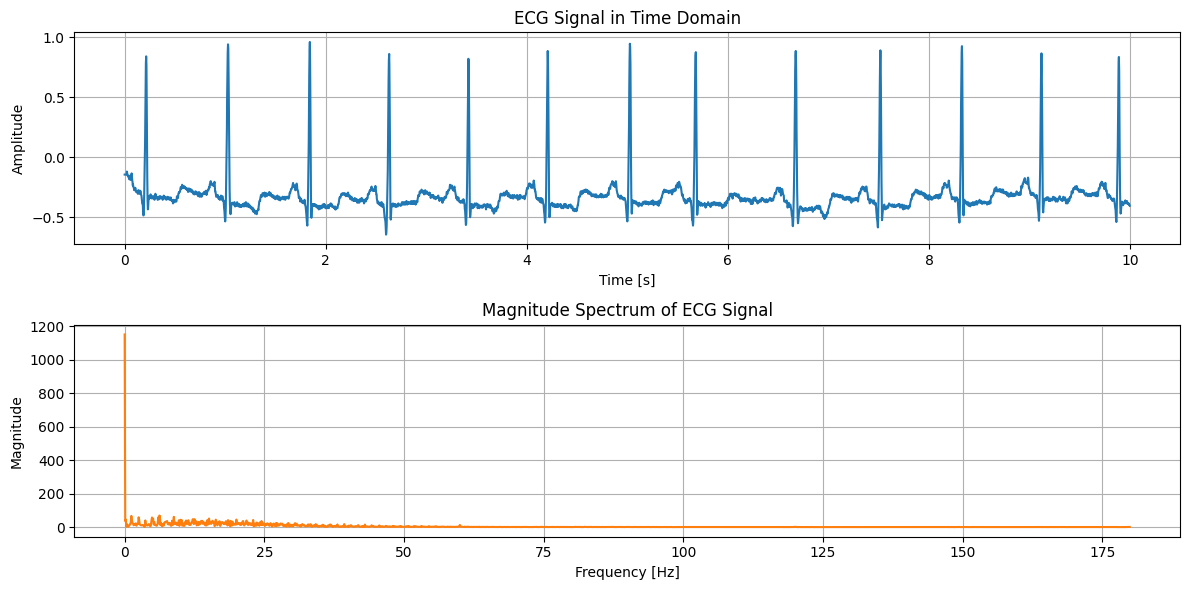

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

# Load CSV file
df = pd.read_csv('samples.csv')

print('Header:', df.columns.tolist())

df = df.drop(0)  # Remove header row

# Convert time column to seconds
df.iloc[:, 0] = df.iloc[:, 0].str.strip("'")  # Remove extra quotes
df.iloc[:, 0] = df.iloc[:, 0].apply(lambda x: sum(float(t) * f for t, f in zip(x.split(":"), [60, 1])))

# Convert the rest of the columns to float
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)

# Convert DataFrame to NumPy array
data_array = df.to_numpy()
print(f"Shape of data {data_array.shape}")

# Extract time and ECG signals
time = data_array[:, 0] - data_array[0, 0]  # Normalize time to start from 0
ecg_signal = data_array[:, 1]  # Assuming the first column after time is ECG

# Compute FFT
N = len(ecg_signal)
fs = 1 / np.mean(np.diff(time))  # Approximate sampling frequency
fft_values = fft(ecg_signal)
freqs = fftfreq(N, 1/fs)

# Plot ECG signal in time domain
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(time, ecg_signal, color='C0')
plt.title("ECG Signal in Time Domain")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.grid()

# Plot frequency spectrum
plt.subplot(2, 1, 2)
plt.plot(freqs[:N//2], np.abs(fft_values[:N//2]), color='C1')
plt.title("Magnitude Spectrum of ECG Signal")
plt.xlabel("Frequency [Hz]")
plt.ylabel("Magnitude")
plt.grid()

plt.tight_layout()
plt.show()
